## Exploratory Data Analysis using Pandas

In [1]:
#Uyarı mesajlarını kapatmak için
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('model_training_data.csv')

In [3]:
#verinin ilk 5 satırı görüntülenir.
data.head()

,x1,x2,y
0,0.336494,-0.985951,0.0
1,-0.011043,-0.105529,1.0
2,0.238160,-0.617417,1.0
3,-0.366783,-0.713819,1.0
4,1.221923,-1.039399,0.0


In [4]:
#verinin boyutu öğrenilir.
data.shape

(100, 3)

In [5]:
#tüm kolonlar hakkında doluluk oranı, veri tipi, bellek kullanımı gibi bilgilere erişilir.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
x1    100 non-null float64
x2    100 non-null float64
y     100 non-null float64
dtypes: float64(3)
memory usage: 2.5 KB


In [6]:
#özet istatistikler görüntülenir.
data.describe()

,x1,x2,y
count,100.000000,100.000000,100.000000
mean,0.010008,-0.101173,0.510000
std,0.839081,0.770054,0.502418
min,-1.888875,-1.759458,0.000000
25%,-0.535333,-0.709249,0.000000
50%,-0.008253,-0.082512,1.000000
75%,0.455796,0.463845,1.000000
max,1.690513,1.743953,1.000000


In [7]:
#Dilenen kolon içerisinde kaç farklı değer olduğu
#ve bu değerlerden kaçar adet olduğu incelenir.
data['y'].value_counts()
#Bu komut sınırlı sayıda durum ya da sınıf içeren kolonlara uygulanmalıdır.
#Sürekli veri içeren kolonlarda uygulak hem anlamsızdır hem de CPU yorucudur.

1.0    51
0.0    49
Name: y, dtype: int64

In [8]:
#kolonların birbirleri ile korelasyonları görüntülenir.
#1'e yaklaşan değerler yüksek korelasyon belirtir.
data.corr()

,x1,x2,y
x1,1.000000,-0.046865,-0.110713
x2,-0.046865,1.000000,0.038901
y,-0.110713,0.038901,1.000000


In [9]:
#Veri setimizi özellikler ve etiketler olarak ayrıştırıyoruz.
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])

## Train Test Split

In [10]:
#modeli eğitmek üzere kullanacağımız eğitim verisi (training data)
#ile modelimizin ne kadar iyi çalıştığını ölçmemize yarayan
#test verisini ayrıştırıyoruz.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Model Training

In [11]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
from sklearn.neural_network import MLPClassifier
MLP_classifier = MLPClassifier()
MLP_classifier.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [13]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
from sklearn.svm import SVC
SVM_classifier = SVC()
SVM_classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Prediction

In [15]:
y_pred_LR = LR_classifier.predict(X_test)
y_pred_MLP = MLP_classifier.predict(X_test)
y_pred_DT = DT_classifier.predict(X_test)
y_pred_SVM = SVM_classifier.predict(X_test)

## Visualization

Text(0.5, 1.0, 'Train Data Set')

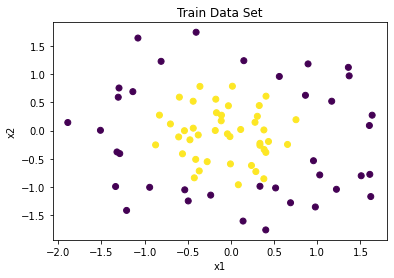

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X_train[:,0],X_train[:,1],c=y_train)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Train Data Set')

Text(0.5, 1.0, 'Test Data Set')

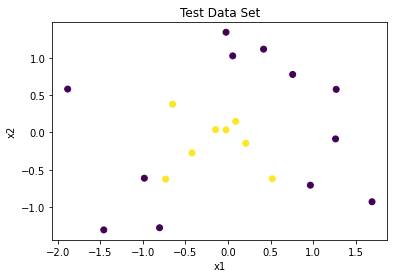

In [17]:
fig, ax = plt.subplots()
ax.scatter(X_test[:,0],X_test[:,1],c=y_test)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Test Data Set')

Text(0.5, 1.0, 'Logistic Regression Predictions')

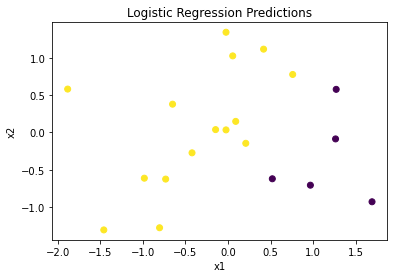

In [18]:
fig, ax = plt.subplots()
ax.scatter(X_test[:,0],X_test[:,1],c=y_pred_LR)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Logistic Regression Predictions')

Text(0.5, 1.0, 'Multilayer Perceptron Predictions')

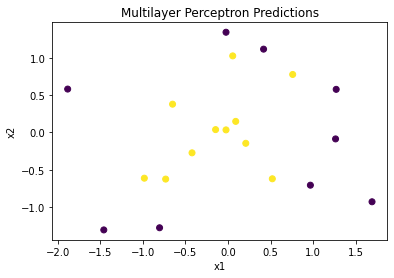

In [19]:
fig, ax = plt.subplots()
ax.scatter(X_test[:,0],X_test[:,1],c=y_pred_MLP)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Multilayer Perceptron Predictions')

Text(0.5, 1.0, 'Decision Tree Predictions')

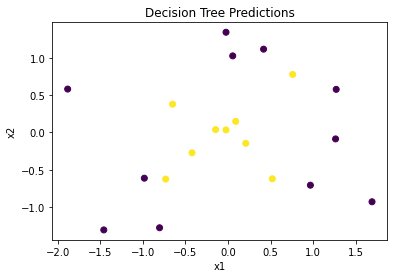

In [20]:
fig, ax = plt.subplots()
ax.scatter(X_test[:,0],X_test[:,1],c=y_pred_DT)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Decision Tree Predictions')

Text(0.5, 1.0, 'Support Vector Machines Predictions')

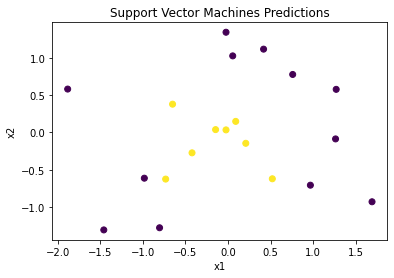

In [21]:
fig, ax = plt.subplots()
ax.scatter(X_test[:,0],X_test[:,1],c=y_pred_SVM)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Support Vector Machines Predictions')